<a href="https://colab.research.google.com/github/jlonge4/gen_ai_utils/blob/main/flux1_fp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers --upgrade

In [8]:
!pip freeze | grep -E "torch|diffusers|transformers"

diffusers==0.32.2
sentence-transformers==3.4.1
torch @ https://download.pytorch.org/whl/cu124/torch-2.5.1%2Bcu124-cp311-cp311-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu124/torchaudio-2.5.1%2Bcu124-cp311-cp311-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu124/torchvision-0.20.1%2Bcu124-cp311-cp311-linux_x86_64.whl
transformers==4.49.0


In [2]:
id = 'Comfy-Org/flux1-dev'

In [5]:
from huggingface_hub  import notebook_login
notebook_login()

In [3]:
!wget https://huggingface.co/Comfy-Org/flux1-dev/resolve/main/flux1-dev-fp8.safetensors

--2025-03-08 02:36:31--  https://huggingface.co/Comfy-Org/flux1-dev/resolve/main/flux1-dev-fp8.safetensors
Resolving huggingface.co (huggingface.co)... 3.165.102.22, 3.165.102.58, 3.165.102.6, ...
Connecting to huggingface.co (huggingface.co)|3.165.102.22|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/55/c7/55c73edb17ac436d7eb50ec6765ae882a2b99221eb1c8643fae0277ebacff2e6/8e91b68084b53a7fc44ed2a3756d821e355ac1a7b6fe29be760c1db532f3d88a?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27flux1-dev-fp8.safetensors%3B+filename%3D%22flux1-dev-fp8.safetensors%22%3B&Expires=1741403844&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MTQwMzg0NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzU1L2M3LzU1YzczZWRiMTdhYzQzNmQ3ZWI1MGVjNjc2NWFlODgyYTJiOTkyMjFlYjFjODY0M2ZhZTAyNzdlYmFjZmYyZTYvOGU5MWI2ODA4NGI1M2E3ZmM0NGVkMmEzNzU2ZDgyMWUzNTVhYzFhN2I2ZmUyOWJlNzYwYzFkYjUzMmYzZ

In [6]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_single_file("flux1-dev-fp8.safetensors", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload()

prompt = "a tiny astronaut hatching from an egg on the moon"
out = pipe(
    prompt=prompt,
    guidance_scale=3.5,
    height=768,
    width=1360,
    num_inference_steps=15,
).images[0]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_projection.weight']
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/15 [00:00<?, ?it/s]

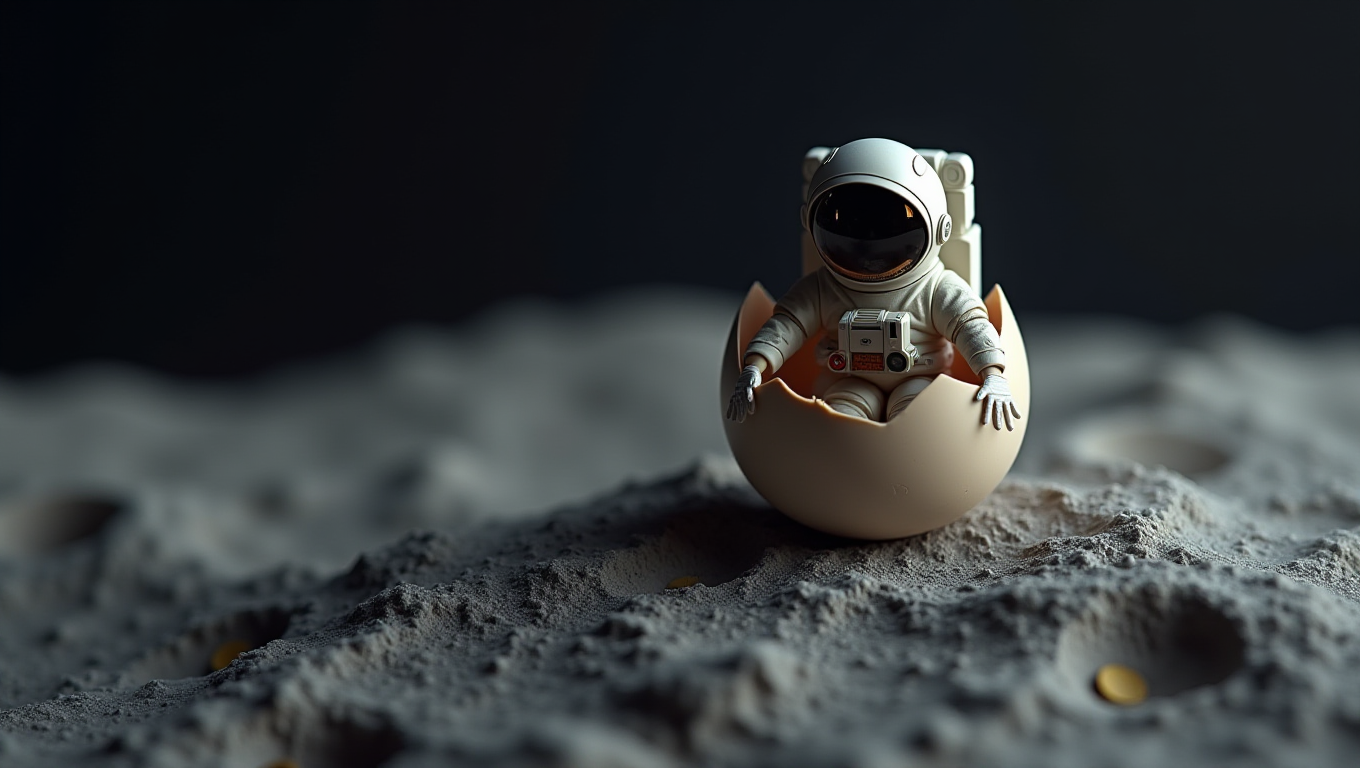

In [7]:
from IPython.display import display

# The output from your model is already a PIL image
display(out)

In [9]:
type(out)

PIL.Image.Image

In [12]:
import io
import base64
import json

buffered = io.BytesIO()
out.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue()).decode()

# Create JSON response
response = json.dumps({"image": img_str})

In [13]:
response

'{"image": "iVBORw0KGgoAAAANSUhEUgAABVAAAAMACAIAAABNQtvSAAEAAElEQVR4nOz965okKa4FCkreVT3ft2vP+z/tCc0PkLR04WIeHplZ+wxdnWFuBkIIaUlggPF//vuP/D9M/P/w6z8kwkxERMwiQkTj35KYRjYhoTYDseUhIiG/bpNWw69XpGc/mPqKmJhIUgUC+efFyMIbOnpfhJjnv+uEdJxJK8INEzLYFZFBf5SYGcdvZoJ6RSkCc0qOrAf8n5FZW0vEypDQJNr15uxDDhTapgs0ZFwy80qcyoJxyEQydALp6zVXRWKiXR+IrPhZKI1mMyFM0bbsx4JalIlHc8ZF0jnjikSY2Wxg8onCd2krKWbRa2MgqE3pFiYhzW8dbKRHddiQJE+zhSz32QS3crxyLgQ5Vek4P1Cp8Qe18RBQJEROK7Oj7HPMIuUflZnZ4sriiz5Dpdhe6ShoEebEQcmaqEaAmAWQxrSR8c+LX2ieXppZRKq0c8v0/9NMJStEYC4wz6p4FccGsSSUtZQX/LmCYZ3EoZnOWDAEh3F1V4k2ZagTkL0RVABw/4AN2qA/R+liIaal0wRkEuLXy+1xegBp/alyzVZxbJk7DiKxDlOAKhrCHCwK1VbxcAX+cGlZOXS8iFoERQdg7k79hQJg8AVoa2zkN0kinm8zm6Bai8c8xjb4xJKiwrO5I3BpTOCPsoGISKa74h/8RwhgDu0deaJCHeRZKl0+LRq+8NbFSag6zMgmebQko8wD6k+K0IbTYmgwogc55VBDwTfA82B606eEyswoLRcxgRELCasjHsyrLqWGCdHIpuZ06CUAmBH1zAuhYI6mYMF2RSEcIwaTxWRYyYjXNeFXG87egWaFXnDCFPhgw8YvN0RiVl/29fXlTLLdtxsBVK2Xx3hBBS4gYeuiJGZTupXDYsid7tRUHPNtKsTnkEDF18Vv/tP437pcsK/JoWlmGOAE9itMKWtR253t0KYHMcAq

In [26]:
from PIL import Image
import numpy as np

def process_image_response(response):
    # Parse the JSON response body
    response = json.loads(response)
    # output_body = json.loads(response["image"].read().decode("utf-8"))

    # Decode the base64 image string
    image_data = base64.b64decode(response['image'])  # Note: changed from "images[0]" to "image"

    # Convert to PIL Image
    output_image = Image.open(io.BytesIO(image_data))

    # Optionally save the image
    # output_image.save("output_image.png")

    # Convert to numpy array
    output_array = np.array(output_image)

    # Handle grayscale images by converting to RGB
    if len(output_array.shape) == 2:
        output_array = np.stack([output_array] * 3, axis=-1)

    # Convert to float32 and normalize to 0-1 range
    output_array = output_array.astype(np.float32) / 255.0

    # Create tensor in format expected by save_images: [B, H, W, C]
    output_tensor = torch.from_numpy(output_array)
    if len(output_tensor.shape) == 3:
        output_tensor = output_tensor.unsqueeze(0)  # Add batch dimension

    return output_tensor


In [27]:
tensor = process_image_response(response)
tensor

tensor([[[[0.0118, 0.0235, 0.0431],
          [0.0078, 0.0118, 0.0471],
          [0.0078, 0.0157, 0.0353],
          ...,
          [0.0784, 0.0941, 0.1098],
          [0.0745, 0.0863, 0.1020],
          [0.0941, 0.0941, 0.1216]],

         [[0.0118, 0.0196, 0.0392],
          [0.0157, 0.0235, 0.0431],
          [0.0118, 0.0157, 0.0314],
          ...,
          [0.0863, 0.0980, 0.1137],
          [0.0863, 0.1020, 0.1176],
          [0.0824, 0.0902, 0.1098]],

         [[0.0078, 0.0196, 0.0471],
          [0.0078, 0.0196, 0.0471],
          [0.0078, 0.0196, 0.0392],
          ...,
          [0.0824, 0.0980, 0.1176],
          [0.0824, 0.0980, 0.1216],
          [0.0863, 0.0941, 0.1216]],

         ...,

         [[0.2824, 0.3294, 0.3294],
          [0.2863, 0.3333, 0.3373],
          [0.2863, 0.3333, 0.3412],
          ...,
          [0.2902, 0.3294, 0.3412],
          [0.2863, 0.3255, 0.3451],
          [0.2784, 0.3216, 0.3451]],

         [[0.2824, 0.3255, 0.3216],
          [0.2824